In [7]:
import geoplot as gplt 
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify as mc
import glob

#해안선 받아놓기
coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='utf8') 
coastline= coastline.to_crs(epsg=5179) 

In [2]:
#맵 그리기 함수선언
def plot_map(data):
    ax = data.plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=1)
    coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
    plt.grid(True, alpha=0.5, linestyle='--')
    
def plot_colormap(data, column, interval, data2=None, data3=None, figsize = [50,30]):
    if data2 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    elif data3 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    else:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        data3.plot(ax = ax, facecolor='red', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')

In [3]:
UNDER_SEA = gpd.read_file('./Ex/220105/해저지형(1min)_유효값.shp', encoding='utf8')
UNDER_SEA= UNDER_SEA.to_crs(epsg=5179) 

In [5]:
flist1 = glob.glob('./Ex/220209/고려구역/**/*.shp', recursive=True)
for fname in flist1:
    print(fname.split('\\')[-1].split('.')[0])
flist1

선상낚시포인트


['./Ex/220209/고려구역\\선상낚시포인트.shp']

선상낚시포인트


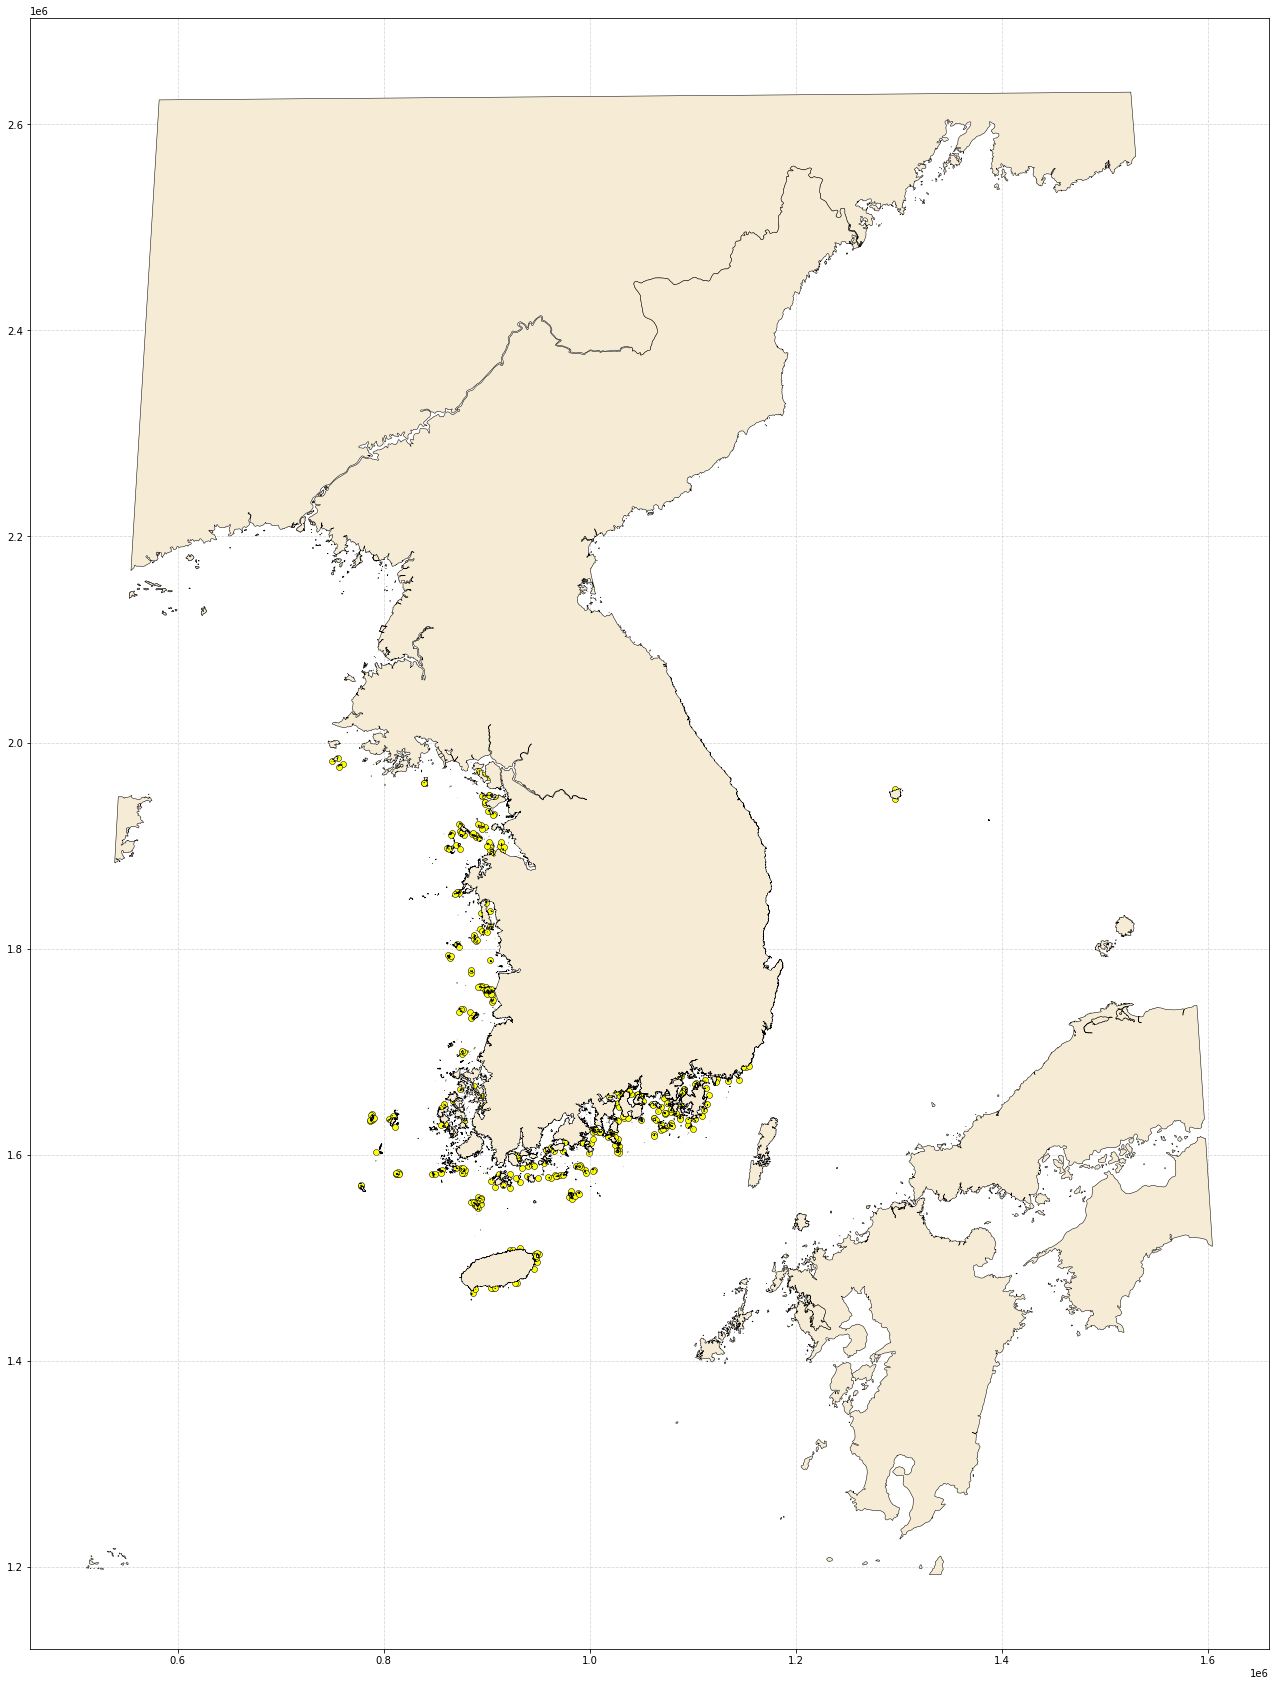

In [4]:
# flist = ['D:/###기타업무/개인연구/2021/Geopandas/Ex/220203/법정정보/9.환경생태계(26)/해양보호생물서식지.shp']
for fname in flist1:
    print(fname.split('\\')[-1].split('.')[0])
    try:
        object = gpd.read_file(fname, encoding='utf8')
        # object = object['geometry']
    except Exception as e:
        # print(e, fname)
        object = gpd.read_file(fname, encoding='euckr')
        # object = object['geometry']
    # print(object)   
    object= object.to_crs(epsg=5179)
    # result = gpd.overlay( input, object, how='difference')
    
   
    plot_map(object)
    # result = gpd.sjoin(object, input,  op='intersects')
    plt.savefig('./result/ex9/'+fname.split('\\')[-1].split('.')[0],dpi=300)
    # plt.savefig('./result/ex8/test.png')
    # result.drop_duplicates(['MIN1'], keep='first', inplace=True)

In [4]:
result = UNDER_SEA

In [5]:
flist2 = glob.glob('./Ex/220209/제외구역/**/*.shp', recursive=True)
for fname in flist2:
    print(fname.split('\\')[-1].split('.')[0])
flist2

국가어항
근해안강망어업
근해통발어업
근해형망어업
대형트롤어업
동해구중형트롤어업
무역항


['./Ex/220209/제외구역\\국가어항.shp',
 './Ex/220209/제외구역\\근해안강망어업.shp',
 './Ex/220209/제외구역\\근해통발어업.shp',
 './Ex/220209/제외구역\\근해형망어업.shp',
 './Ex/220209/제외구역\\대형트롤어업.shp',
 './Ex/220209/제외구역\\동해구중형트롤어업.shp',
 './Ex/220209/제외구역\\무역항.shp']

In [26]:
MIN_1 = gpd.read_file('./Ex/220209/15분격자EEZ로자른걸1분에조인한거.shp', encoding='utf8')  
MIN_1 =MIN_1.to_crs(epsg=5179)

국가어항
근해안강망어업
근해통발어업
근해형망어업
대형트롤어업
동해구중형트롤어업
무역항


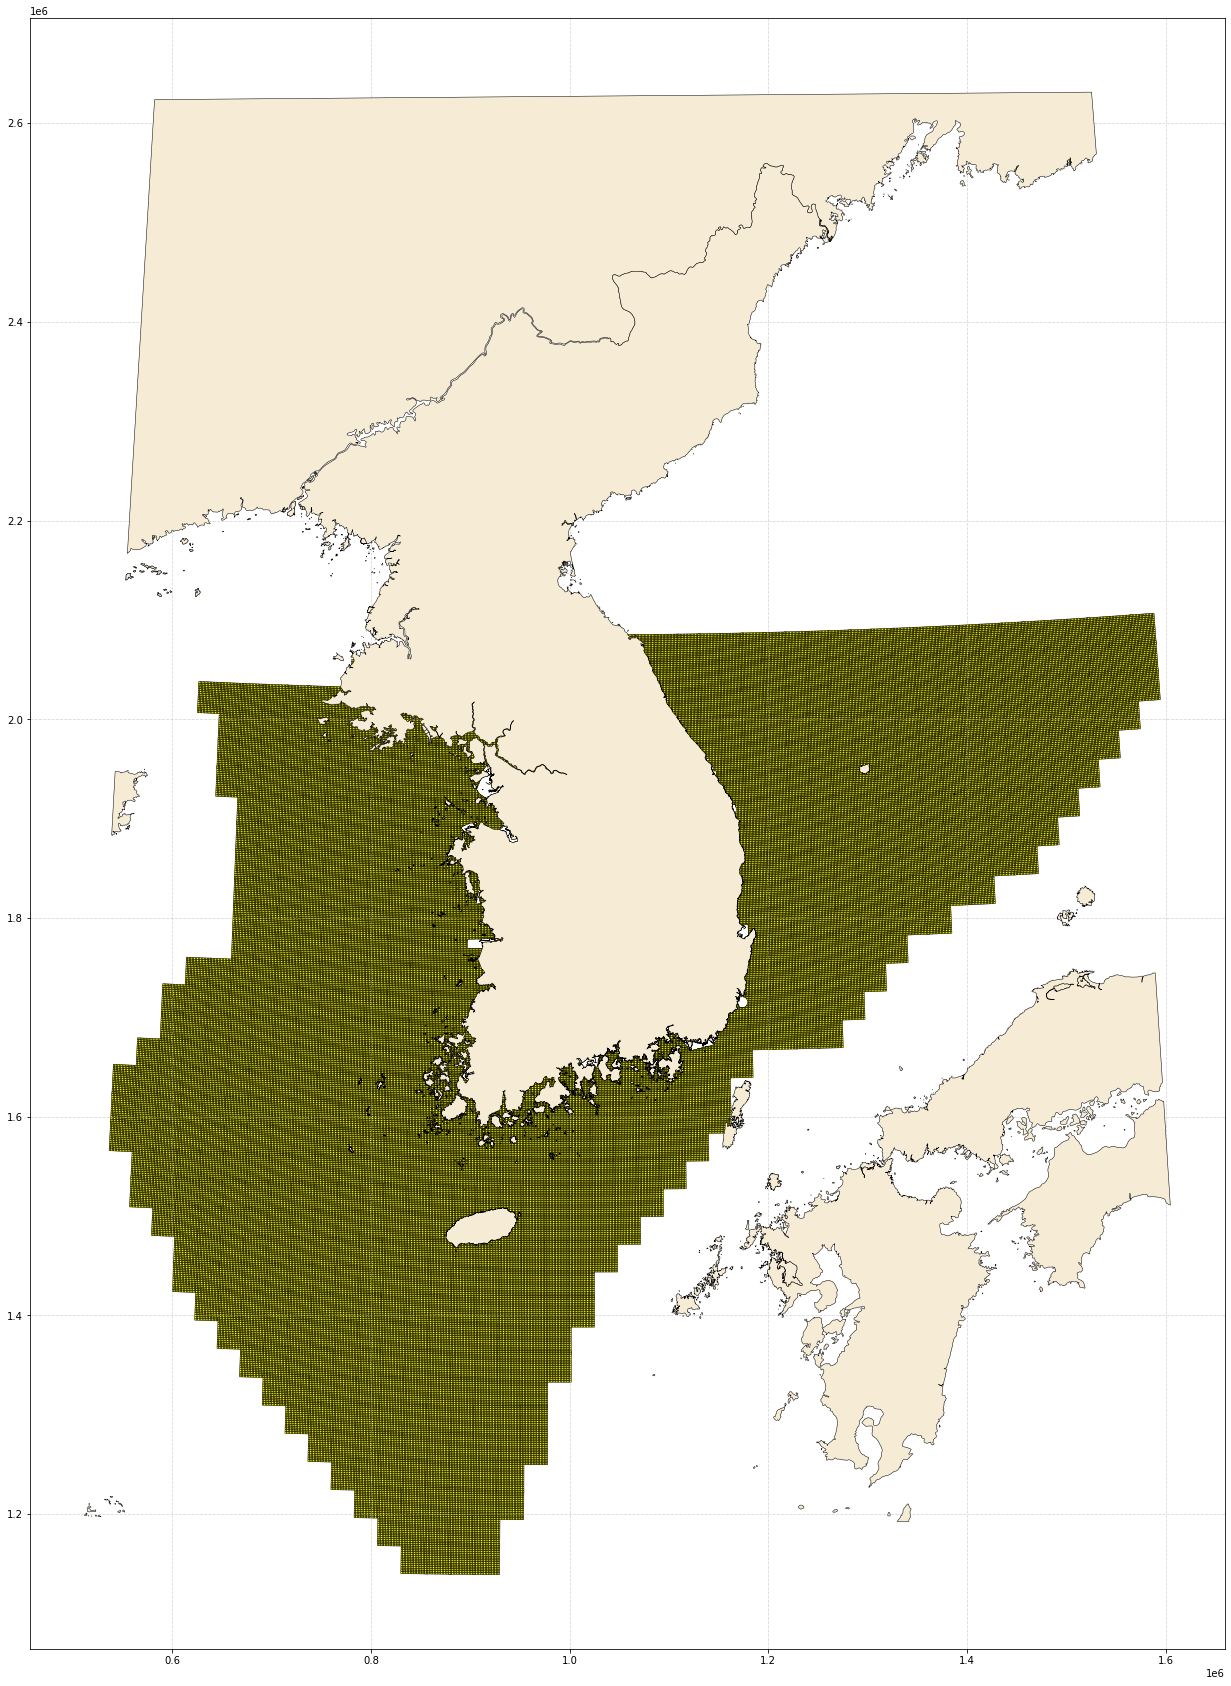

In [28]:
# flist = ['D:/###기타업무/개인연구/2021/Geopandas/Ex/220203/법정정보/9.환경생태계(26)/해양보호생물서식지.shp']
result = MIN_1
for fname in flist2:
    print(fname.split('\\')[-1].split('.')[0])
    try:
        object = gpd.read_file(fname, encoding='utf8')
        # object = object['geometry']
    except Exception as e:
        # print(e, fname)
        object = gpd.read_file(fname, encoding='euckr')
        # object = object['geometry']
    # print(object)   
    object= object.to_crs(epsg=5179)
    # result = gpd.overlay(object, result, how='difference')
    result = gpd.overlay(result, object,  how='difference')

plot_map(result)
    # plot_map(result)
    # # result = gpd.sjoin(object, input,  op='intersects')
    # plt.savefig('./result/ex9/'+fname.split('\\')[-1].split('.')[0],dpi=300)
plt.savefig('./result/ex9/test.png')
    # result.drop_duplicates(['MIN1'], keep='first', inplace=True)

In [22]:
object

FID                                           geometry
0     0  MULTIPOLYGON (((1098539.402 1657913.547, 10985...
1     1  POLYGON ((1112400.631 1653110.736, 1112439.884...
2     2  MULTIPOLYGON (((1111428.650 1656242.765, 11114...
3     3  POLYGON ((1081560.112 1648161.441, 1081560.101...
4     4  POLYGON ((1108941.771 1680087.234, 1108936.487...
5     5  POLYGON ((1100790.122 1684086.370, 1100676.915...
6     6  POLYGON ((1149559.481 1938521.656, 1149579.226...
7     7  POLYGON ((1143104.327 1951689.900, 1143105.029...
8     8  POLYGON ((1138039.561 1959291.772, 1138042.636...
9     9  POLYGON ((1095865.112 2022862.161, 1095842.334...
10   10  POLYGON ((912496.507 1472697.928, 912501.565 1...
11   11  POLYGON ((1026352.299 1660409.608, 1026353.273...
12   12  POLYGON ((920671.051 1951575.657, 920670.422 1...
13   13  MULTIPOLYGON (((936304.632 1889352.287, 936285...
14   14  MULTIPOLYGON (((906839.360 1891575.291, 906839...
15   15  POLYGON ((909567.476 1814510.540, 909558.323 1...
16   16  MULTIPOLYGON (((930150.725 1778448.450, 930108...
17   17  POLYGON ((931165.117 1593676.683, 931183.010 1...
18   18  MULTIPOLYGON (((911891.797 1503638.579, 911891...
19   19  MULTIPOLYGON (((1023376.435 1657105.924, 10233...
20   20  MULTIPOLYGON (((1051056.249 1659481.336, 10510...
21   21  MULTIPOLYGON (((1024430.149 1639426.663, 10244...
22   22  MULTIPOLYGON (((1113249.505 1676774.453, 11132...
23   23  MULTIPOLYGON (((1170090.501 1724276.005, 11700...
24   24  POLYGON ((1176460.694 1779484.339, 1176455.720...
25   25  POLYGON ((1164392.109 1910660.118, 1164393.015...
26   26  POLYGON ((1144376.671 1945716.450, 1144380.757...
27   27  POLYGON ((888701.716 1880182.450, 888701.494 1...
28   28  POLYGON ((917052.784 1942592.748, 917052.803 1...
29   29  POLYGON ((930106.150 1778440.880, 930107.590 1...
30   30  POLYGON ((906060.071 1471105.009, 906273.677 1...
31   31  POLYGON ((899284.375 1472958.782, 899270.735 1...
32   32  MULTIPOLYGON (((896599.013 1647076.926, 896599...

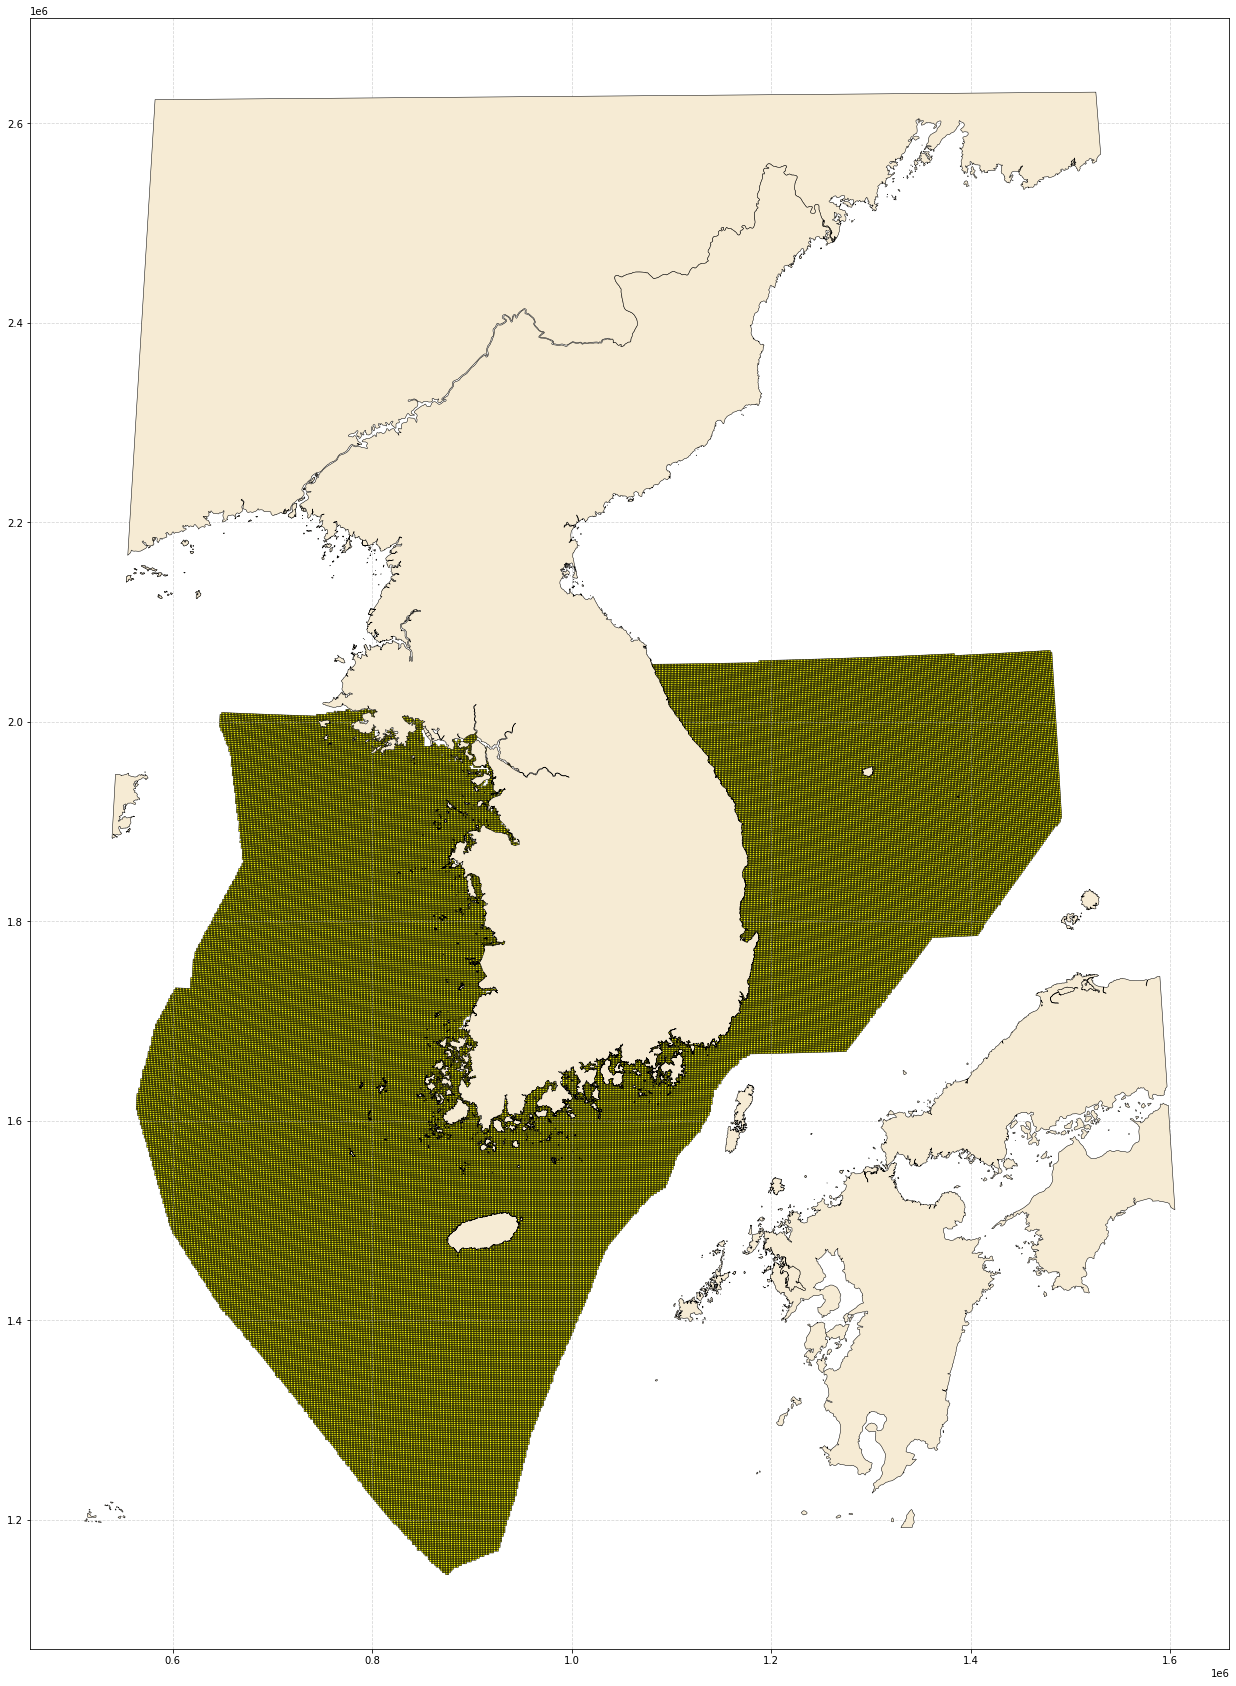

In [10]:
plot_map(UNDER_SEA)

In [12]:
result = gpd.overlay(UNDER_SEA, object,  how='difference')

In [14]:
UNDER_SEA

LAYER  ELEVATION          MIN1  SA1         MIN3  SA3  \
0       Unknown Area Type    -68.000  GR9_F3G24_U1    1  GR3_F3G24_U    1   
1       Unknown Area Type    -68.000  GR9_F3G24_U4    1  GR3_F3G24_U    1   
2       Unknown Area Type    -68.000  GR9_F3G24_U7    1  GR3_F3G24_U    1   
3       Unknown Area Type    -68.000  GR9_F3G42_A1    1  GR3_F3G42_A    1   
4       Unknown Area Type    -68.000  GR9_F3G42_A4    1  GR3_F3G42_A    1   
...                   ...        ...           ...  ...          ...  ...   
133321  Unknown Area Type   -313.030  GR9_G2J33_P4    1  GR3_G2J33_P    1   
133322  Unknown Area Type   -307.595  GR9_G2J33_P7    1  GR3_G2J33_P    1   
133323  Unknown Area Type   -305.275  GR9_G2J33_U1    1  GR3_G2J33_U    1   
133324  Unknown Area Type   -302.528  GR9_G2J33_U4    1  GR3_G2J33_U    1   
133325  Unknown Area Type   -299.710  GR9_G2J33_U7    1  GR3_G2J33_U    1   

        AVG_ELEV_M  MODE_ELE_M  STD_DEV__M  \
0          -67.923       -67.9    0.052579   
1          -67.997       -68.0    0.010843   
2          -68.000       -68.0    0.000000   
3          -68.000       -68.0    0.000000   
4          -68.000       -68.0    0.000000   
...            ...         ...         ...   
133321    -310.483      -313.0    1.702060   
133322    -306.293      -306.9    0.601267   
133323    -304.056      -305.0    0.819346   
133324    -301.188      -302.1    0.861842   
133325    -299.303      -299.1    0.220252   

                                                 geometry  
0       POLYGON Z ((564015.728 1627589.808 -68.000, 56...  
1       POLYGON Z ((563928.545 1625739.396 -68.000, 56...  
2       POLYGON Z ((563841.399 1623888.985 -68.000, 56...  
3       POLYGON Z ((563754.289 1622038.576 -68.000, 56...  
4       POLYGON Z ((563667.217 1620188.169 -68.000, 56...  
...                                                   ...  
133321  POLYGON Z ((1489039.970 1912480.004 -313.030, ...  
133322  POLYGON Z ((1489147.436 1910628.756 -307.595, ...  
133323  POLYGON Z ((1489254.860 1908777.509 -305.275, ...  
133324  POLYGON Z ((1489362.242 1906926.263 -302.528, ...  
133325  POLYGON Z ((1489469.583 1905075.017 -299.710, ...  

[133326 rows x 10 columns]

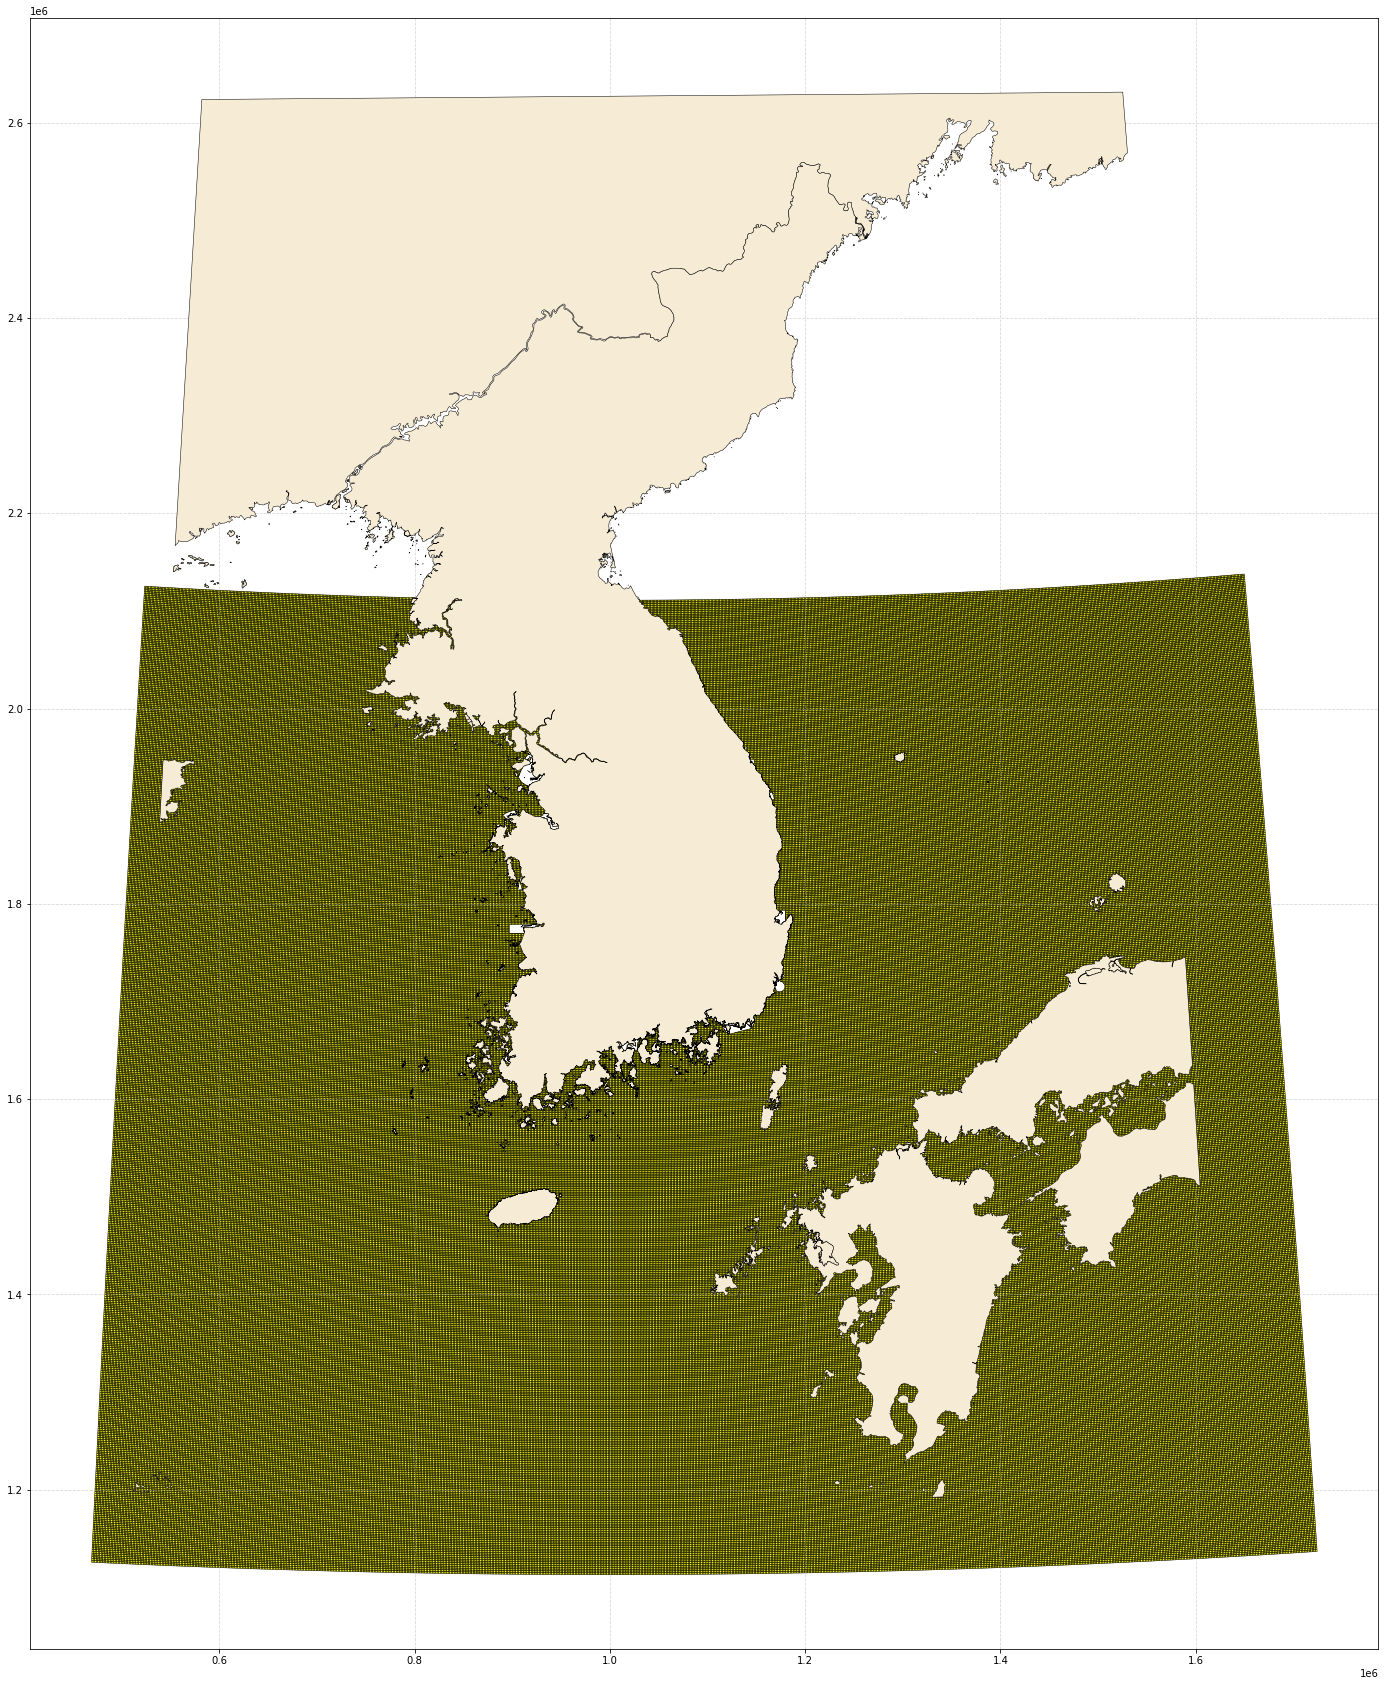

In [23]:
result = gpd.overlay(MIN_1, object,  how='difference')
plot_map(result)

In [24]:
result

MIN1  SA1_mod         MIN3  SA3_mod  \
0       GR9_F1G11_A1        1  GR3_F1G11_A        1   
1       GR9_F1G11_A4        1  GR3_F1G11_A        1   
2       GR9_F1G11_A7        1  GR3_F1G11_A        1   
3       GR9_F1G11_F1        1  GR3_F1G11_F        1   
4       GR9_F1G11_F4        1  GR3_F1G11_F        1   
...              ...      ...          ...      ...   
421195  GR9_K2G44_T6        1  GR3_K2G44_T        1   
421196  GR9_K2G44_T9        1  GR3_K2G44_T        1   
421197  GR9_K2G44_Y3        1  GR3_K2G44_Y        1   
421198  GR9_K2G44_Y6        1  GR3_K2G44_Y        1   
421199  GR9_K2G44_Y9        1  GR3_K2G44_Y        1   

                                                 geometry  
0       POLYGON ((523592.286 2125376.192, 525036.864 2...  
1       POLYGON ((523480.121 2123524.897, 524925.042 2...  
2       POLYGON ((523367.997 2121673.603, 524813.260 2...  
3       POLYGON ((523255.913 2119822.309, 524701.519 2...  
4       POLYGON ((523143.869 2117971.015, 524589.817 2...  
...                                                   ...  
421195  POLYGON ((1722173.162 1145929.508, 1723786.150...  
421196  POLYGON ((1722295.260 1144074.798, 1723908.525...  
421197  POLYGON ((1722417.297 1142220.084, 1724030.840...  
421198  POLYGON ((1722539.273 1140365.367, 1724153.093...  
421199  POLYGON ((1722661.188 1138510.647, 1724275.285...  

[421036 rows x 5 columns]

In [18]:
MIN_1

MIN1  SA1_mod         MIN3  SA3_mod  \
0       GR9_F1G11_A1        1  GR3_F1G11_A        1   
1       GR9_F1G11_A4        1  GR3_F1G11_A        1   
2       GR9_F1G11_A7        1  GR3_F1G11_A        1   
3       GR9_F1G11_F1        1  GR3_F1G11_F        1   
4       GR9_F1G11_F4        1  GR3_F1G11_F        1   
...              ...      ...          ...      ...   
421195  GR9_K2G44_T6        1  GR3_K2G44_T        1   
421196  GR9_K2G44_T9        1  GR3_K2G44_T        1   
421197  GR9_K2G44_Y3        1  GR3_K2G44_Y        1   
421198  GR9_K2G44_Y6        1  GR3_K2G44_Y        1   
421199  GR9_K2G44_Y9        1  GR3_K2G44_Y        1   

                                                 geometry  
0       POLYGON ((523592.286 2125376.192, 525036.864 2...  
1       POLYGON ((523480.121 2123524.897, 524925.042 2...  
2       POLYGON ((523367.997 2121673.603, 524813.260 2...  
3       POLYGON ((523255.913 2119822.309, 524701.519 2...  
4       POLYGON ((523143.869 2117971.015, 524589.817 2...  
...                                                   ...  
421195  POLYGON ((1722173.162 1145929.508, 1723786.150...  
421196  POLYGON ((1722295.260 1144074.798, 1723908.525...  
421197  POLYGON ((1722417.297 1142220.084, 1724030.840...  
421198  POLYGON ((1722539.273 1140365.367, 1724153.093...  
421199  POLYGON ((1722661.188 1138510.647, 1724275.285...  

[421200 rows x 5 columns]

In [19]:
object

FID                                           geometry
0    0  MULTILINESTRING ((885734.209 1956408.315, 8977...
1    1  LINESTRING (896245.751 1731168.207, 892677.326...
2    2  MULTILINESTRING ((866656.593 1861748.270, 8709...

In [ ]:
result = gpd.overlay( object, MIN_1,  how='difference')
plot_map(result)

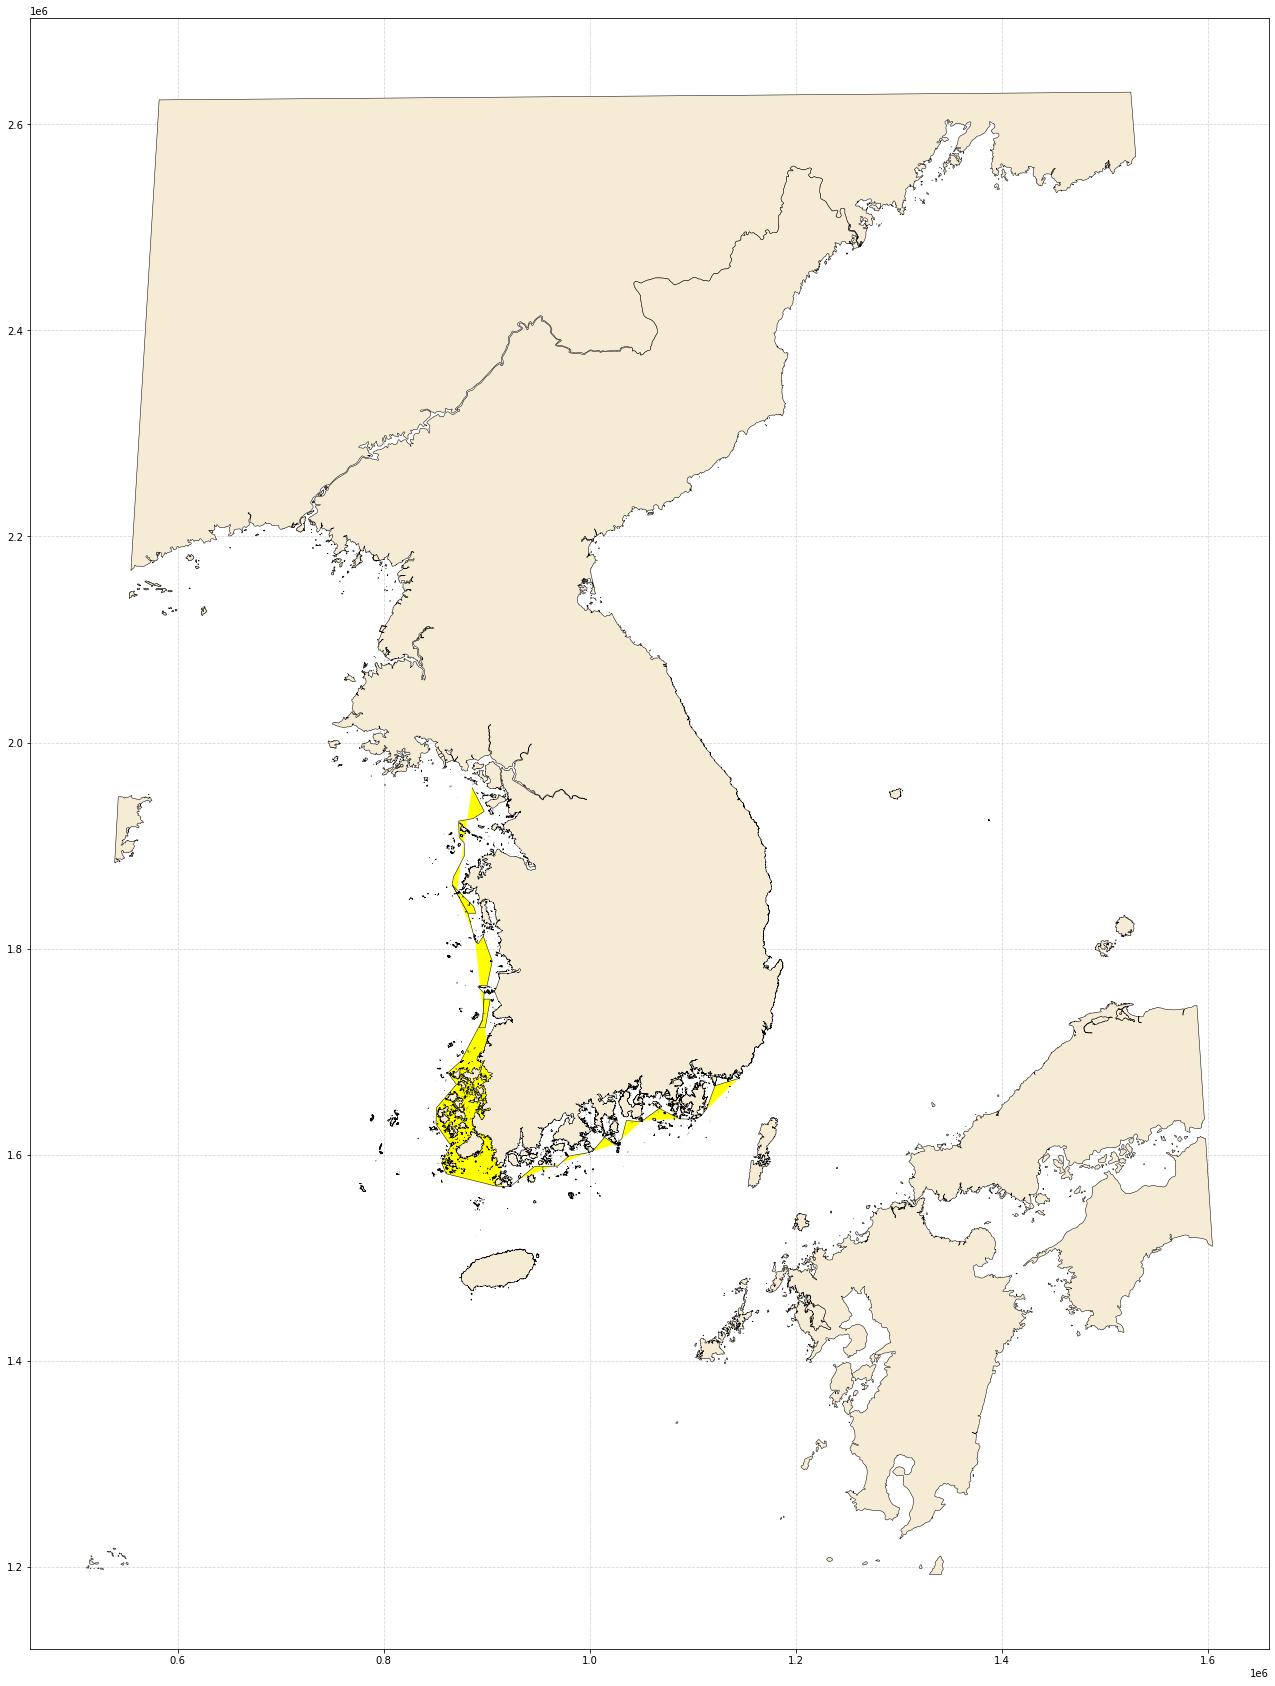

In [11]:

plot_map(object)

국가어항
근해안강망어업
근해통발어업
근해형망어업
대형트롤어업
동해구중형트롤어업
무역항


['./Ex/220209/제외구역\\국가어항.shp',
 './Ex/220209/제외구역\\근해안강망어업.shp',
 './Ex/220209/제외구역\\근해통발어업.shp',
 './Ex/220209/제외구역\\근해형망어업.shp',
 './Ex/220209/제외구역\\대형트롤어업.shp',
 './Ex/220209/제외구역\\동해구중형트롤어업.shp',
 './Ex/220209/제외구역\\무역항.shp']

In [40]:
# flist = ['D:/###기타업무/개인연구/2021/Geopandas/Ex/220203/법정정보/9.환경생태계(26)/해양보호생물서식지.shp']
# df = pd.DataFrame(index=range(0), columns=['geometry'])
# gdf = gpd.GeoDataFrame(df, geometry='geometry')
for fname in flist2[:1]:
    try:
        input = gpd.read_file(fname, encoding='utf8')
        # object = object['geometry']
    except Exception as e:
        # print(e, fname)
        input = gpd.read_file(fname, encoding='euckr')
    input= input.to_crs(epsg=5179)
    input = input[['geometry']]
for fname in flist2[1:]:
    print(fname.split('\\')[-1].split('.')[0])
    try:
        object = gpd.read_file(fname, encoding='utf8')
        # object = object['geometry']
    except Exception as e:
        # print(e, fname)
        object = gpd.read_file(fname, encoding='euckr')
        # object = object['geometry']
    # print(object)   
    object= object.to_crs(epsg=5179)
    object = object[['geometry']]
    input = input.append(object, ignore_index=True)
    # input = gpd.overlay(object, input, how='union')
    
# /gdf = gpd.GeoDataFrame(df, geometry='geometry')
    # plot_map(object)
    # result = gpd.sjoin(object, input,  op='intersects')
    # plt.savefig('./result/ex9/'+fname.split('\\')[-1].split('.')[0],dpi=300)
    # plt.savefig('./result/ex8/test.png')
    # result.drop_duplicates(['MIN1'], keep='first', inplace=True)

근해안강망어업
근해통발어업
근해형망어업
대형트롤어업
동해구중형트롤어업
무역항


In [41]:
input

geometry
0    POLYGON ((1098386.006 1628540.745, 1098376.244...
1    POLYGON ((1092033.605 1638915.419, 1092027.622...
2    MULTIPOLYGON (((1099337.392 1636241.450, 10993...
3    POLYGON ((1102847.094 1637919.922, 1102846.858...
4    POLYGON ((1111309.612 1661431.888, 1111314.853...
..                                                 ...
151  POLYGON ((917052.784 1942592.748, 917052.803 1...
152  POLYGON ((930106.150 1778440.880, 930107.590 1...
153  POLYGON ((906060.071 1471105.009, 906273.677 1...
154  POLYGON ((899284.375 1472958.782, 899270.735 1...
155  MULTIPOLYGON (((896599.013 1647076.926, 896599...

[156 rows x 1 columns]

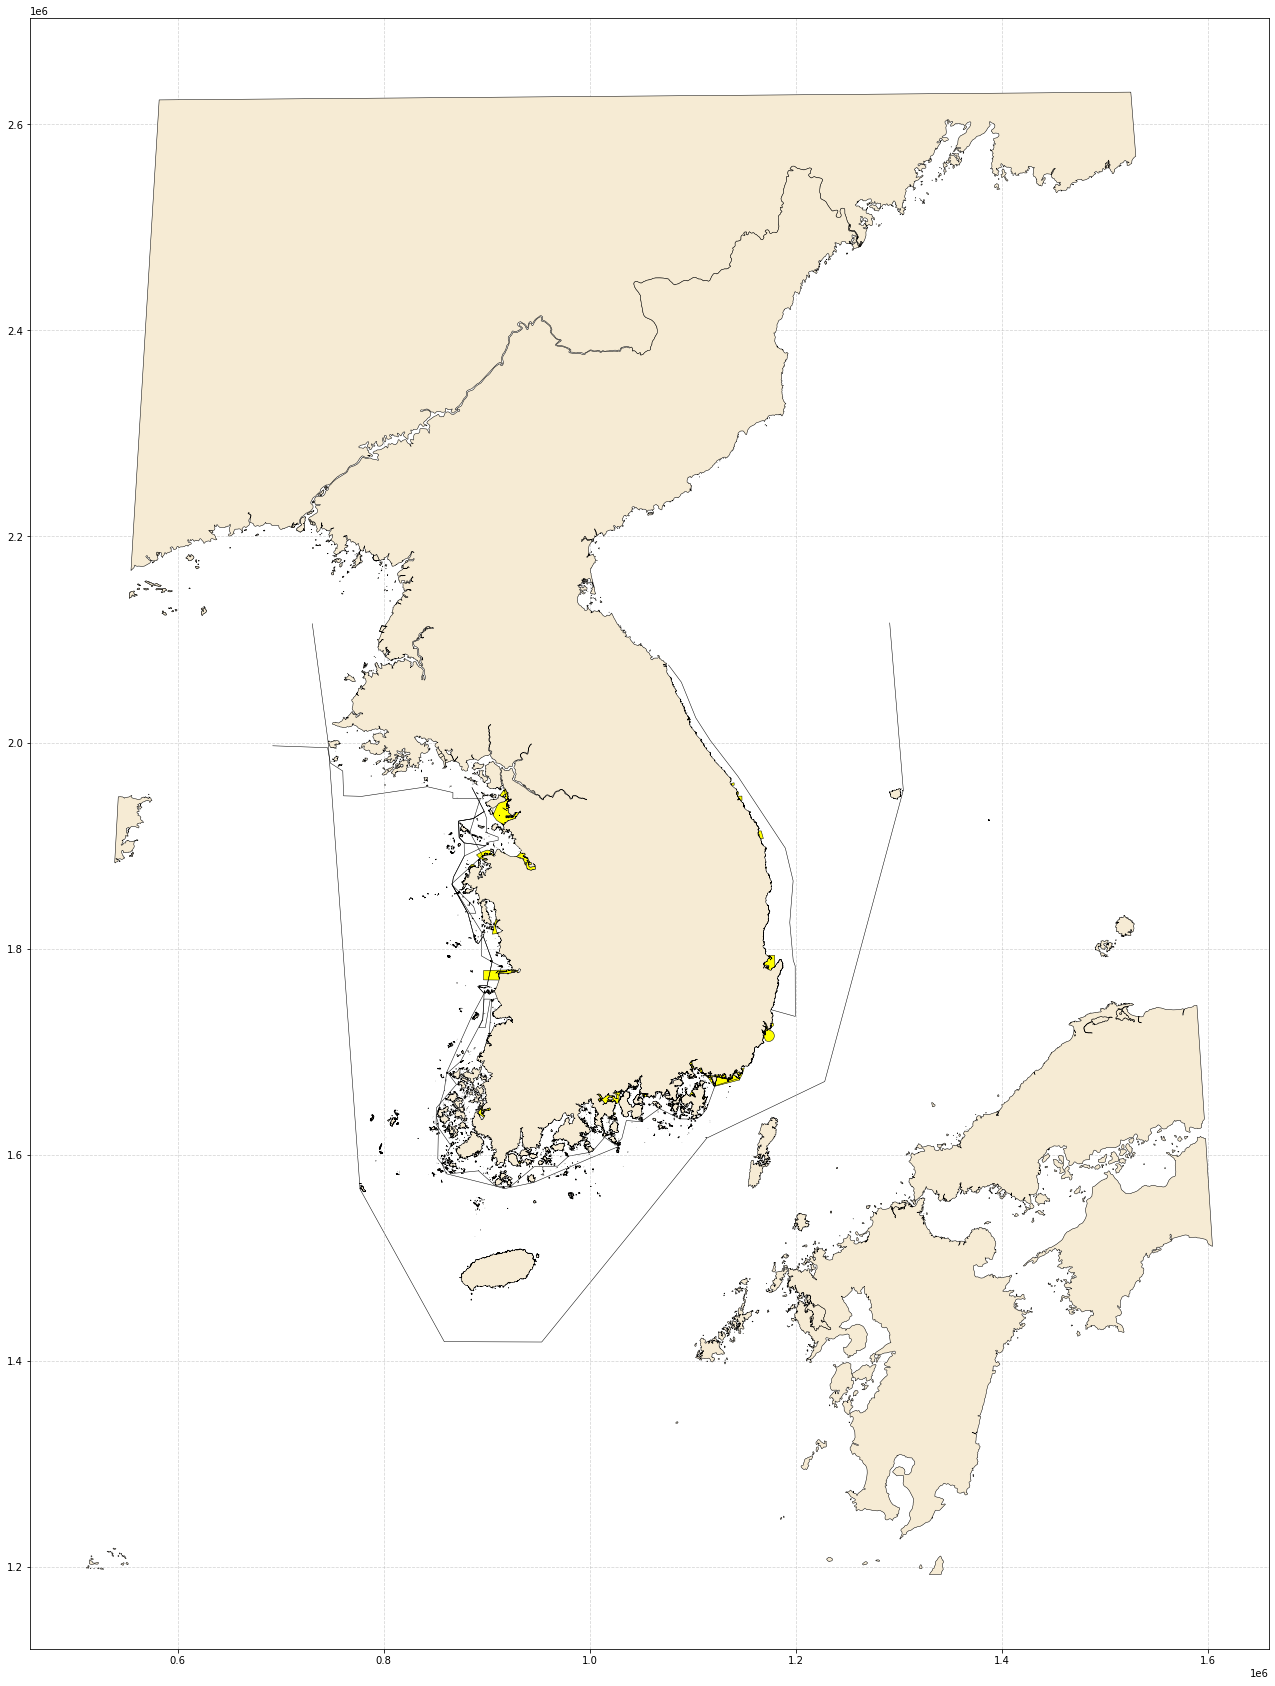

In [42]:
plot_map(input)

In [14]:
gdf

geometry
0   POLYGON ((1098386.006 1628540.745, 1098376.244...
1   POLYGON ((1092033.605 1638915.419, 1092027.622...
2   MULTIPOLYGON (((1099337.392 1636241.450, 10993...
3   POLYGON ((1102847.094 1637919.922, 1102846.858...
4   POLYGON ((1111309.612 1661431.888, 1111314.853...
..                                                ...
28  POLYGON ((917052.784 1942592.748, 917052.803 1...
29  POLYGON ((930106.150 1778440.880, 930107.590 1...
30  POLYGON ((906060.071 1471105.009, 906273.677 1...
31  POLYGON ((899284.375 1472958.782, 899270.735 1...
32  MULTIPOLYGON (((896599.013 1647076.926, 896599...

[156 rows x 1 columns]

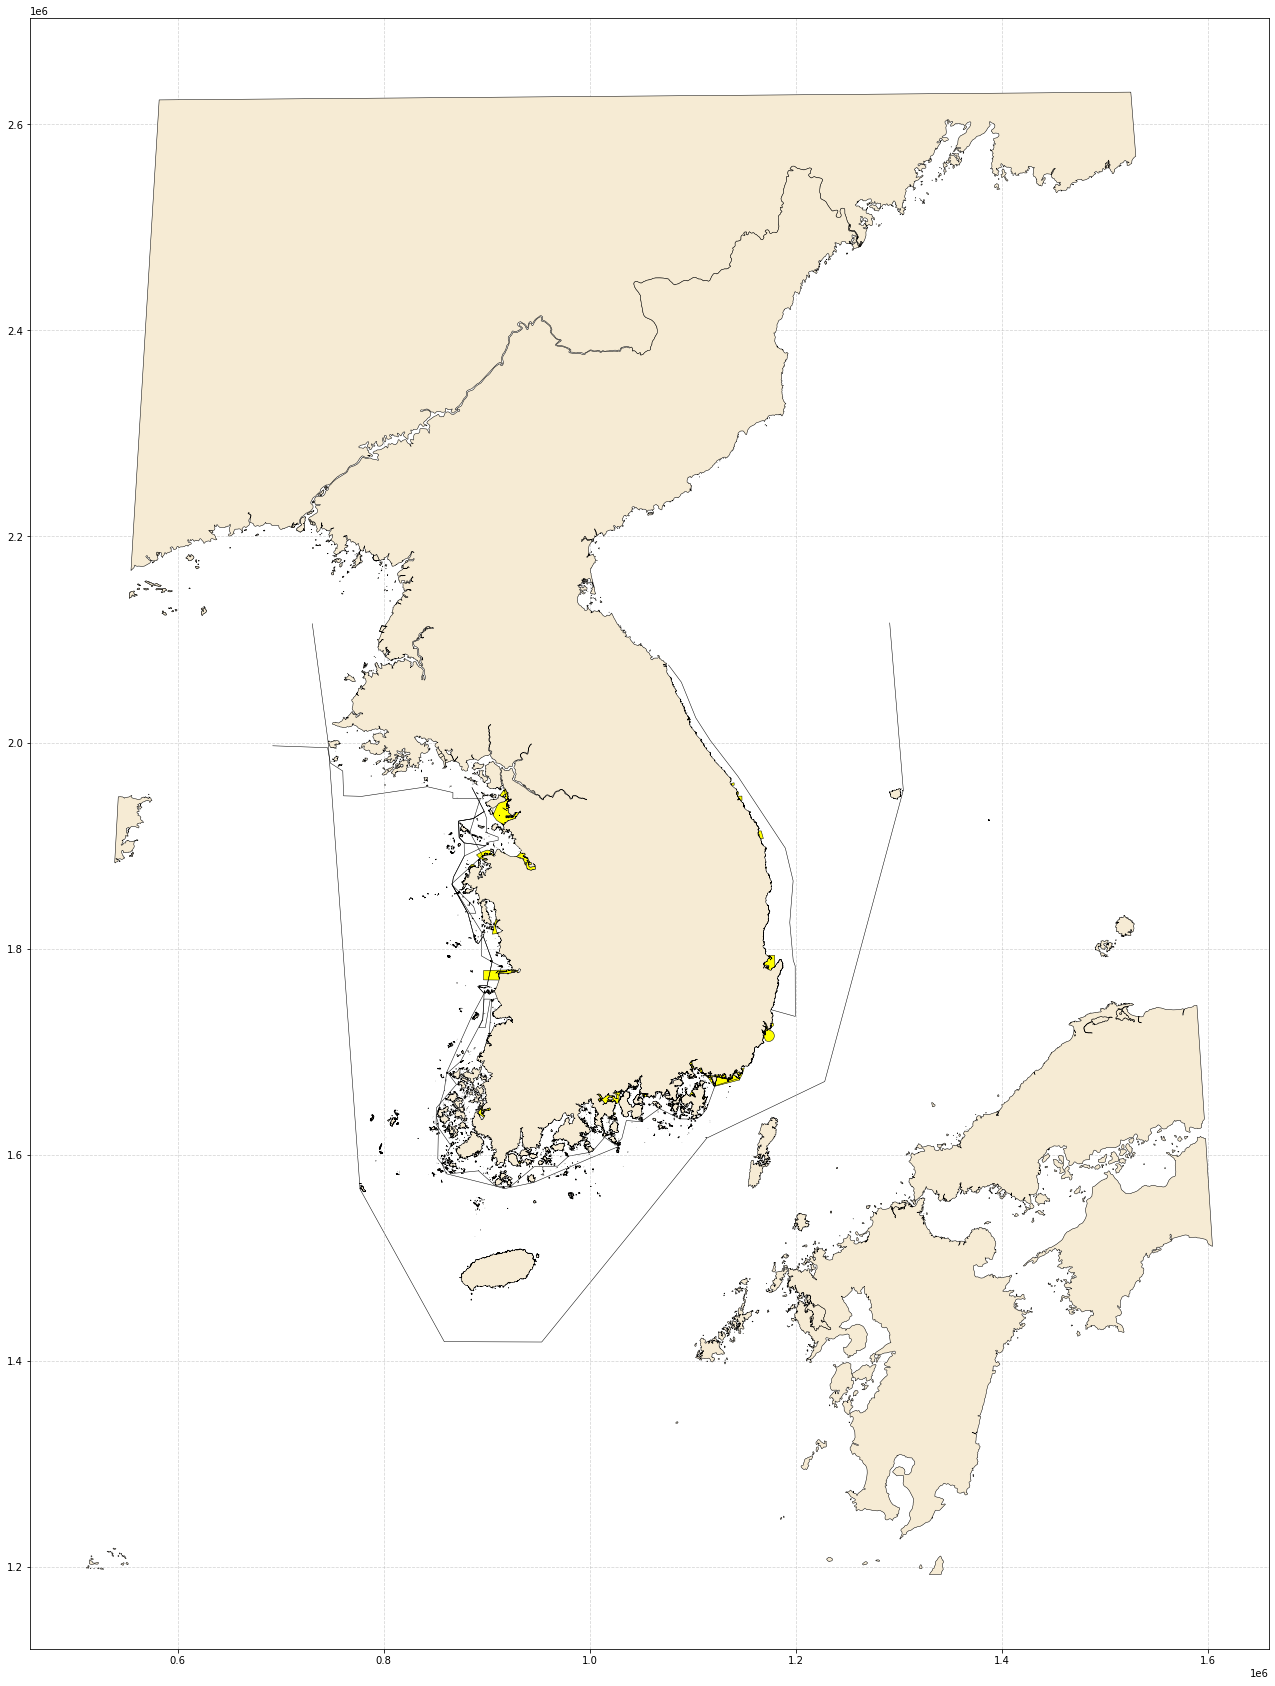

In [15]:
plot_map(gdf)

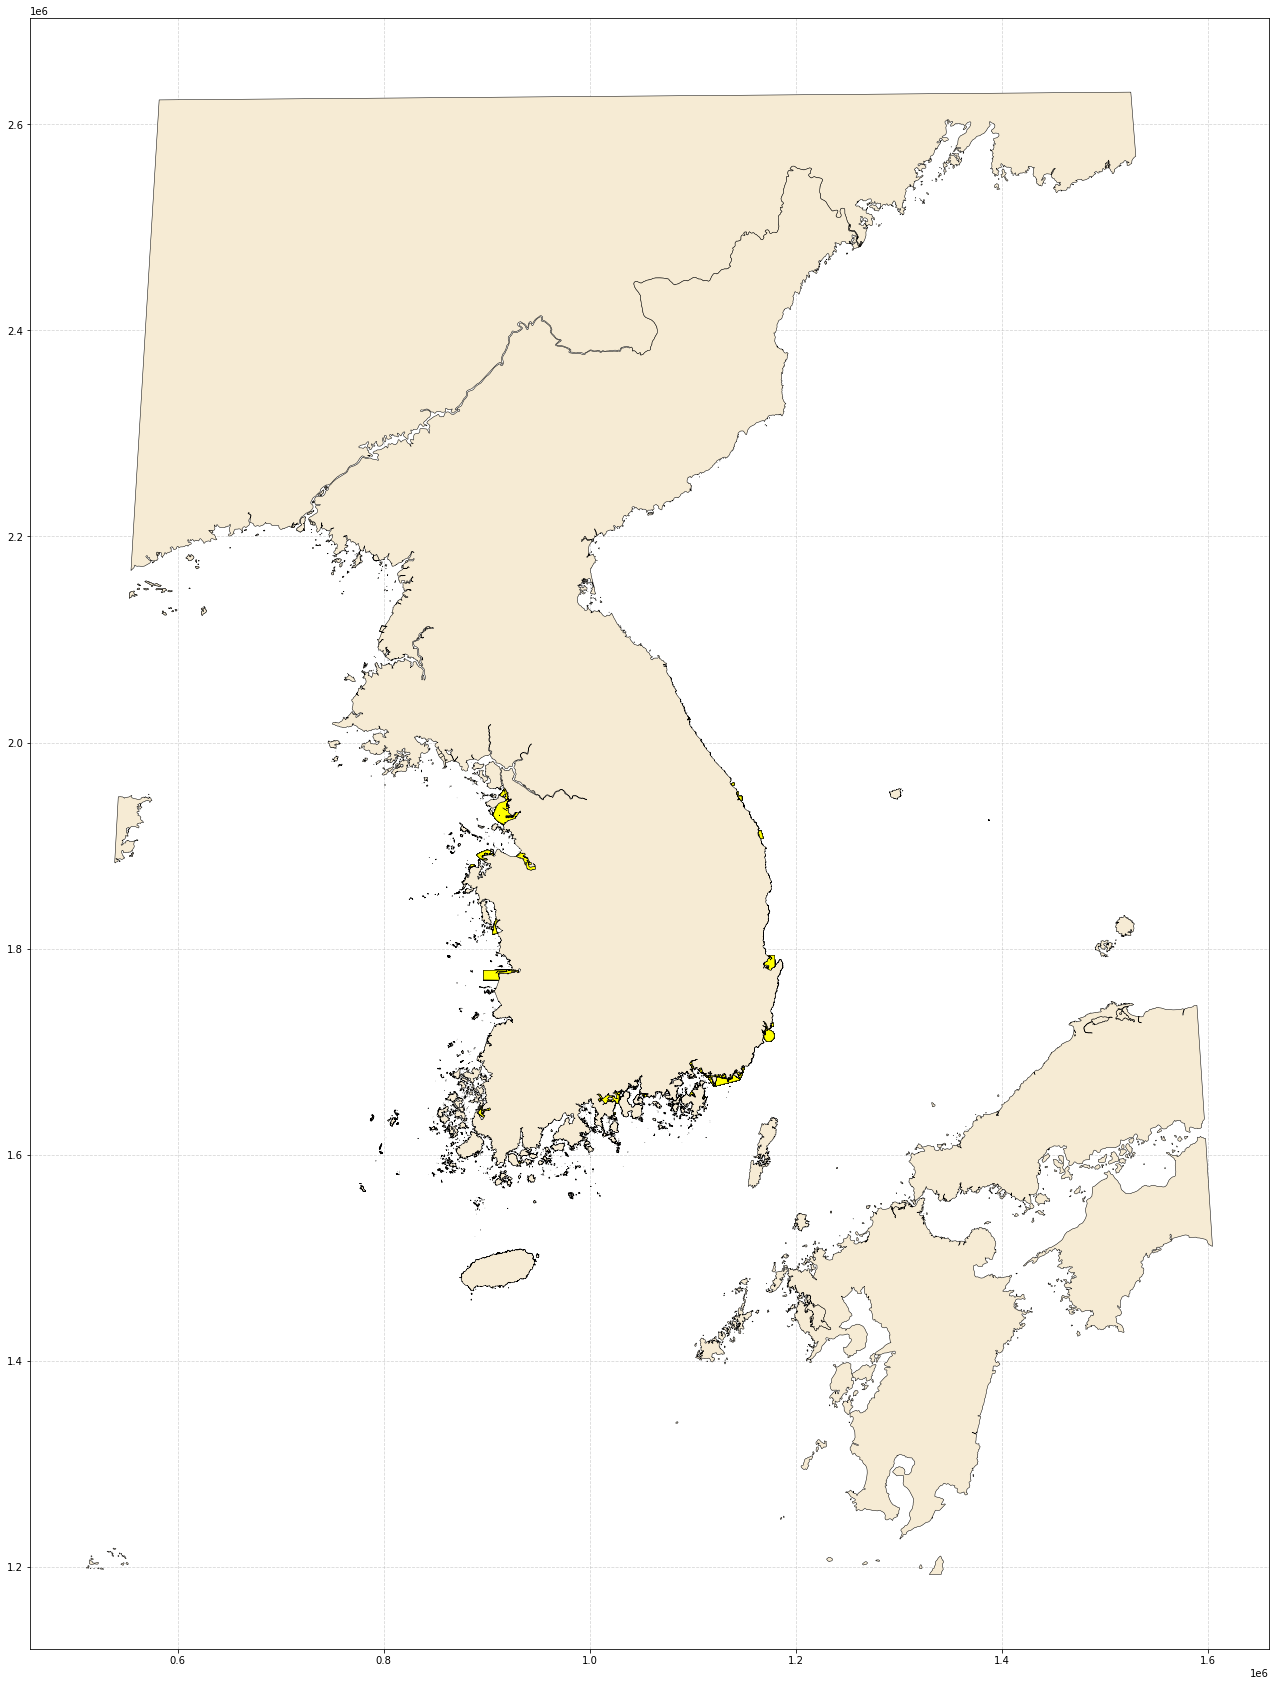

In [9]:
result1 = gpd.sjoin(object, UNDER_SEA, how='inner', op='intersects')
plot_map(result1)